# `Case Study Linear Regression`

### Liabraries

In [828]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error as mse

from warnings import filterwarnings
filterwarnings(action='ignore')

### Sample data points

In [4]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=30,random_state=53)

In [5]:
df = pd.DataFrame(np.concatenate([X,np.expand_dims(y,1)],axis=1),columns=['X','y'])
df.head()

,X,y
0,0.503622,34.658894
1,1.802009,158.915555
2,-0.623148,-72.306025
3,-0.406043,-29.432096
4,-0.617011,-26.333059


### taking absolute values

In [6]:
X = np.abs(X)
y = np.abs(y)

In [7]:
df = pd.DataFrame(np.concatenate([X,np.expand_dims(y,1)],axis=1),columns=['X','y'])
df.head()

,X,y
0,0.503622,34.658894
1,1.802009,158.915555
2,0.623148,72.306025
3,0.406043,29.432096
4,0.617011,26.333059


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=45)

### Data points

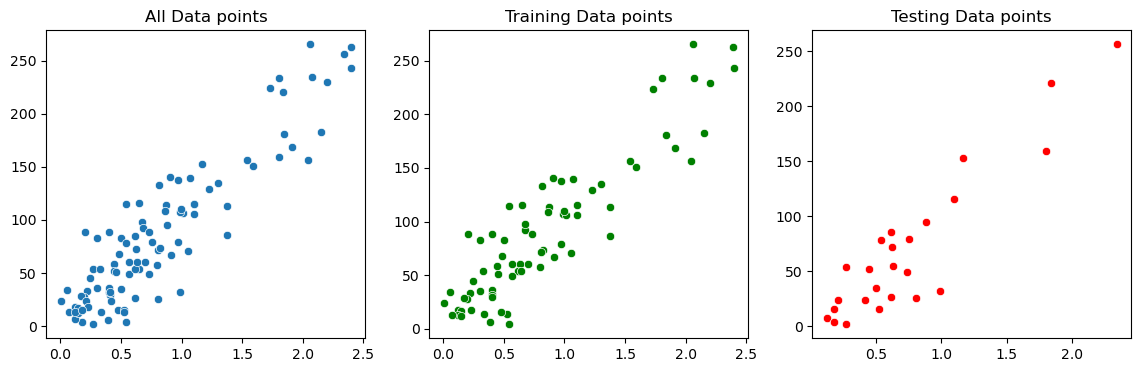

In [9]:
fig,ax = plt.subplots(1,3,figsize=(14,4))

plt.subplot(131)
sns.scatterplot(X.flatten(),y.flatten())
plt.title("All Data points")
plt.subplot(132)
sns.scatterplot(X_train.flatten(),y_train.flatten(),color='g')
plt.title("Training Data points")
plt.subplot(133)
sns.scatterplot(X_test.flatten(),y_test.flatten(),color='r')
plt.title("Testing Data points")
plt.show()

$$
\Large\ Loss = \Large\sum _{n=1}^{n=100}\left(y_{actual}-y_{predicted}\right)^2
$$

$$
\Large\ y_{predicted}\ =m x\ +\ c
$$

$$
\Large\ Loss = \Large\sum _{n=1}^{n=100}\left(y_{actual}-\left(mx\ +\ c\right)\right)^2
$$

$$
\Large slope_{intercept}=\Large\frac{∂\ Loss}{∂\ c}=2 \sum _{n=1}^{n=100}\left(y - m𝑥-𝑐)\right)\left(-1\right)
$$

$$
\Large slope_{coefficient}=\Large\frac{∂\ Loss}{∂\ m}=2 \sum _{n=1}^{n=100}\left(y - m𝑥-𝑐)\right)\left(-x\right)
$$

$$
\Large\ c_{new}\ = c_{old}\ -\ learning \ rate * slope_{intercept} 
$$

$$
\Large\ m_{new}\ = m_{old}\ -\ learning \ rate * slope_{coefficient} 
$$

In [533]:
X_train_1 = X_train
y_train_1 = y_train

## Class to tune model parameters

In [879]:
class Gradient_descent:
    def __init__(self,epoch,learning_rate):
        self.epoch = epoch
        self.learning_rate = learning_rate
        self.__slope = 50
        self.__intercept = 50
        self.__loss_list = list()
        self.__intercept_list = list()
        self.__slope_list = list()
    def fit(self,X,y):
        for i in range(self.epoch):
            # y = mx+c
            y_pred = (self.__slope*X.ravel()) + self.__intercept
            loss = np.sum(np.square(y - y_pred))
            
            self.__loss_list.append(loss)
            # derivative w.r.t intercept
            intercept_derivative = -2*np.sum(y-y_pred)
            # derivative w.r.t slope
            slope_derivative = -2*np.sum((y-y_pred)*X.ravel())
            # step size
            step_size_intercept = self.learning_rate * intercept_derivative
            step_size_slope = self.learning_rate * slope_derivative
            # correction of intercept & slope @ each step
            self.__intercept = self.__intercept - step_size_intercept
            self.__slope = self.__slope - step_size_slope
            
            self.__intercept_list.append(self.__intercept)
            self.__slope_list.append(self.__slope)
        self.every_step_loss = np.array(self.__loss_list)
        self.every_step_intercept = np.array(self.__intercept_list)
        self.every_step_slope = np.array(self.__slope_list)
        self.intercept_ = self.__intercept
        self.coef_ = self.__slope
    def predict(self,X_test):
        return  X_test.ravel() * self.__slope + self.__intercept

In [872]:
# Initializing the class

lr = Gradient_descent(2000,0.001)

# applying fit method on class

lr.fit(X_train,y_train)

## Intercept

In [873]:
lr.intercept_

8.520901857856355

## slope

In [874]:
lr.coef_

97.72465206674738

## Predictions

In [877]:
lr.predict(X_test)

array([ 57.7372088 , 184.62158755, 188.27811723, 115.90766492,
        80.24456394, 237.24137604, 105.29305556,  52.15854567,
        69.41779826,  61.41277421,  82.07877719,  35.11423693,
        49.38566908,  35.14163691,  59.65617805,  68.81807512,
        25.96586391, 122.54228393,  70.35003571,  28.95518189,
        20.70242794,  94.8303278 ,  26.30303038,  87.60992024,
        68.33157878])

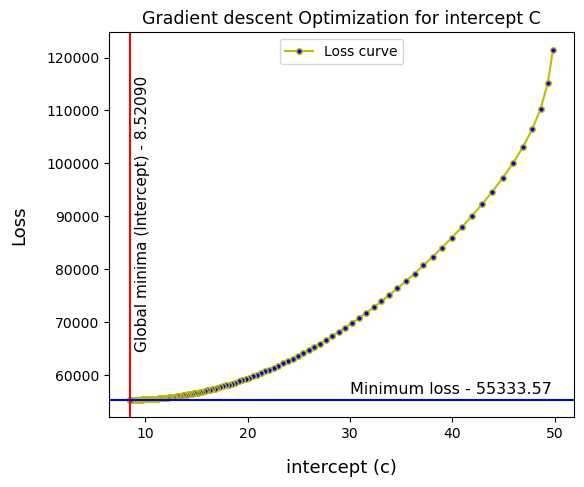

In [814]:
x = lr.every_step_intercept
y = lr.every_step_loss
plt.figure(figsize=(6,5))
plt.plot(x,y,marker='o',ms=4,color='y',mfc='b',label='Loss curve')
plt.axvline(x=lr.intercept_,c='r')
plt.text(9,65000,f"Global minima (Intercept) - {x[-1]:0.5f}",rotation=90,fontsize=11)
plt.axhline(y=loss_list[-1],c='b')
plt.text(30,56500,f"Minimum loss - {loss_list[-1]:0.2f}",fontsize=11.5)
plt.title("Gradient descent Optimization for intercept C",fontsize=12.5)
plt.ylabel("Loss",fontsize=13,labelpad=13)
plt.xlabel("intercept (c)",fontsize=13,labelpad=13)
plt.legend(loc='upper center')
plt.show()

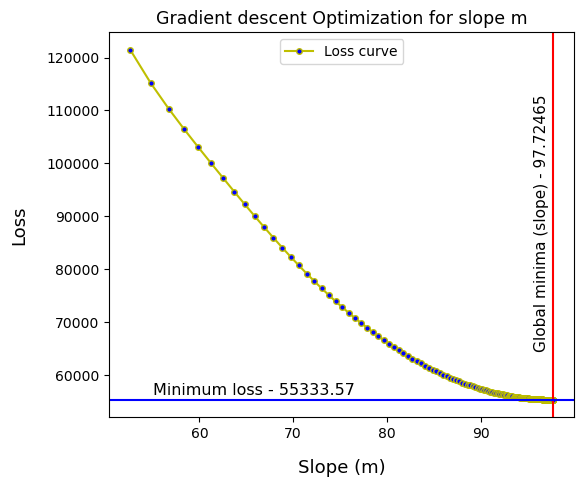

In [824]:
x1 = lr.every_step_slope
y1 = lr.every_step_loss
plt.figure(figsize=(6,5))
plt.plot(x1,y1,marker='o',ms=4,color='y',mfc='b',label='Loss curve')
plt.axvline(x=lr.coef_,c='r')
plt.text(95.7,65000,f"Global minima (slope) - {x1[-1]:0.5f}",rotation=90,fontsize=11)
plt.axhline(y=lr.every_step_loss[-1],c='b')
plt.text(55,56200,f"Minimum loss - {loss_list[-1]:0.2f}",fontsize=11.5)
plt.title("Gradient descent Optimization for slope m",fontsize=12.5)
plt.ylabel("Loss",fontsize=13,labelpad=13)
plt.xlabel("Slope (m)",fontsize=13,labelpad=13)
plt.legend(loc='upper center')
plt.show()

## Comparing with sklearn liabrary

In [854]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [878]:
y_pred

array([ 57.7372088 , 184.62158755, 188.27811723, 115.90766492,
        80.24456394, 237.24137604, 105.29305556,  52.15854567,
        69.41779826,  61.41277421,  82.07877719,  35.11423693,
        49.38566908,  35.14163691,  59.65617805,  68.81807512,
        25.96586391, 122.54228393,  70.35003571,  28.95518189,
        20.70242794,  94.8303278 ,  26.30303038,  87.60992024,
        68.33157878])

In [869]:
print(f"Report - Comparison between sklearn class and own code")
print("-"*75)
print(f"Intercept calculated from Manual Gradient descent Optimization - {lr.coef_:0.6f}")
print(f"Intercept from sklearn class Linear model - {model.coef_[0]:0.6f}")
print(f"Error = {lr.coef_-model.coef_[0]}")
print("-"*75)
print(f"Intercept calculated from Manual Gradient descent Optimization - {lr.intercept_:0.6f}")
print(f"Intercept from sklearn class Linear model - {model.intercept_:0.6f}")
print(f"Error = {lr.intercept_-model.intercept_}")

Report - Comparison between sklearn class and own code
---------------------------------------------------------------------------
Intercept calculated from Manual Gradient descent Optimization - 97.724652
Intercept from sklearn class Linear model - 97.724652
Error = -8.526512829121202e-14
---------------------------------------------------------------------------
Intercept calculated from Manual Gradient descent Optimization - 8.520902
Intercept from sklearn class Linear model - 8.520902
Error = 8.171241461241152e-14


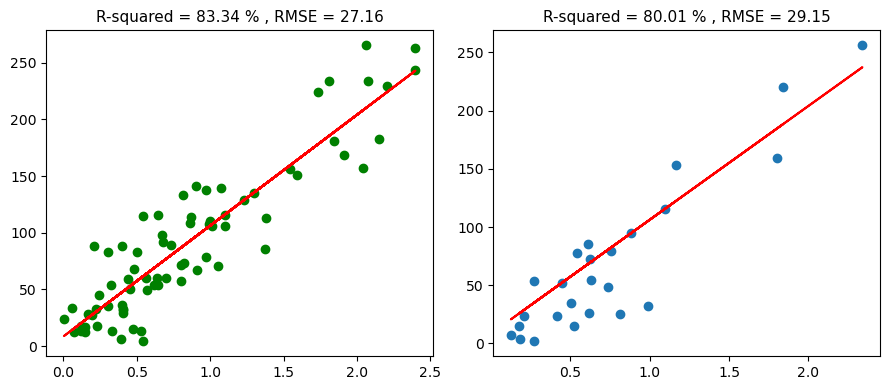

In [868]:
plt.figure(figsize=(9,4))
plt.subplot(121)
plt.scatter(X_train,y_train,label='Data points',c='g')
plt.plot(X_train,model.predict(X_train),'r-',label='Best fit line')
RMSE_train = mse(y_train,model.predict(X_train),squared=False)
plt.title(f"R-squared = {r2_score(y_train,model.predict(X_train))*100:0.2f} % , RMSE = {RMSE_train:0.2f}",
          fontsize=11)

plt.subplot(122)
plt.scatter(X_test,y_test,label='Data points')
RMSE_test = mse(y_test,model.predict(X_test),squared=False)
plt.plot(X_test,model.predict(X_test),'r-',label='Best fit line')
plt.title(f"R-squared = {r2_score(y_test,model.predict(X_test))*100:0.2f} % , RMSE = {RMSE_test:0.2f}",fontsize=11)
plt.tight_layout()
plt.show()